In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('thesis-data.csv')
data

,Acc_X,Acc_Y,Acc_Z,Class
0,2.660984,-9.653030,0.470237,1
1,2.223091,2.223091,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
155402,8.701128,4.238336,-0.194529,21
155403,8.680778,4.261679,-0.159214,21
155404,8.756194,4.168306,-0.144251,21
155405,8.662222,4.219781,-0.183755,21


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155407 entries, 0 to 155406
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Acc_X   155407 non-null  float64
 1   Acc_Y   155407 non-null  float64
 2   Acc_Z   155407 non-null  float64
 3   Class   155407 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 4.7 MB


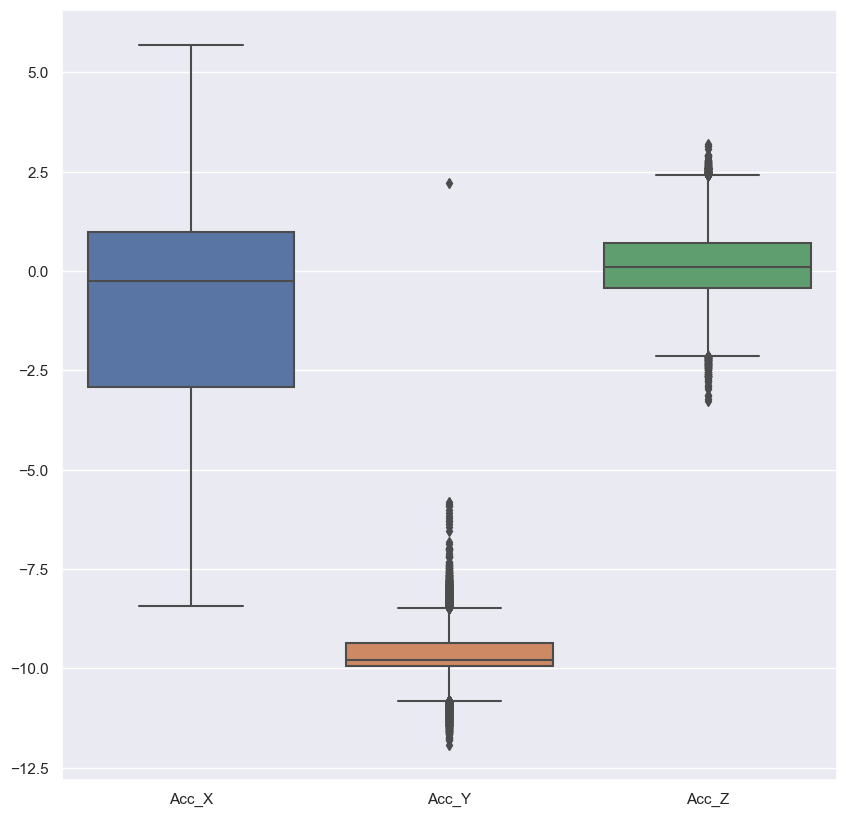

In [4]:
sns.set(rc={'figure.figsize':(10,10)})
fig= sns.boxplot(data=data.iloc[0:30000,0:3])

In [5]:
label = LabelEncoder()
data['label'] = label.fit_transform(data['Class'])
data

,Acc_X,Acc_Y,Acc_Z,Class,label
0,2.660984,-9.653030,0.470237,1,0
1,2.223091,2.223091,2.223091,1,0
2,2.098372,-9.481953,0.926070,1,0
3,2.716461,-9.739352,0.912008,1,0
4,2.288388,-9.371498,0.910390,1,0
...,...,...,...,...,...
155402,8.701128,4.238336,-0.194529,21,20
155403,8.680778,4.261679,-0.159214,21,20
155404,8.756194,4.168306,-0.144251,21,20
155405,8.662222,4.219781,-0.183755,21,20


In [6]:
X = data[['Acc_X', 'Acc_Y', 'Acc_Z']]
y = data['label']

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['Acc_X', 'Acc_Y', 'Acc_Z'])
scaled_X['mag'] = np.sqrt(scaled_X['Acc_X'] ** 2 + scaled_X['Acc_Y'] ** 2 + scaled_X['Acc_Z'] ** 2)
scaled_X['label'] = y.values

scaled_X.head()

,Acc_X,Acc_Y,Acc_Z,mag,label
0,0.916876,-0.805908,-0.491449,1.315930,0
1,0.801750,1.525044,-0.059973,1.723995,0
2,0.768960,-0.772331,-0.379243,1.153958,0
3,0.931461,-0.822851,-0.382704,1.300448,0
4,0.818917,-0.750652,-0.383103,1.175105,0


In [8]:
scaled_X = scaled_X.drop(['Acc_X', 'Acc_Y', 'Acc_Z'], axis=1)


In [9]:
scaled_X

,mag,label
0,1.315930,0
1,1.723995,0
2,1.153958,0
3,1.300448,0
4,1.175105,0
...,...,...
155402,3.223690,20
155403,3.220514,20
155404,3.224321,20
155405,3.213035,20


In [10]:
import scipy.stats as stats


In [11]:
Fs = 20
frame_size = Fs * 10
hop_size = Fs * 5

In [12]:
frames = []
labels = []

In [13]:
for i in range(0, len(scaled_X) - frame_size, hop_size):
    x = scaled_X['mag'].values[i: i + frame_size]
    label = stats.mode(scaled_X['label'][i: i + frame_size])[0][0]
    frames.append([x])
    labels.append(label)


C:\Users\Acer Nitro 5\AppData\Local\Temp\ipykernel_14312\644624756.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(scaled_X['label'][i: i + frame_size])[0][0]


In [14]:
frames

[[array([1.31592991, 1.72399519, 1.15395846, 1.30044836, 1.17510451,
         1.34649856, 1.19602627, 1.38880754, 1.14006002, 1.42817402,
         1.2845855 , 1.35673241, 1.29774795, 1.34850727, 1.12179889,
         1.44394635, 1.19835385, 1.38902588, 1.21927521, 1.40802853,
         1.16430767, 1.44399733, 1.30828908, 1.26031037, 1.33246046,
         1.19538736, 1.43962367, 1.18183908, 1.33385784, 1.23698699,
         1.45168984, 1.15543875, 1.35704163, 1.22294731, 1.3804686 ,
         1.15365542, 1.42704835, 1.16567271, 1.44184976, 1.11267861,
         1.44333703, 1.12185258, 1.47417377, 1.06331185, 1.46973256,
         1.13957073, 1.39799401, 1.04924196, 1.46263984, 1.22561606,
         1.37245708, 1.36245337, 1.23308711, 1.32130417, 1.20171026,
         1.41050808, 1.13193353, 1.43517592, 1.05237029, 1.44160397,
         1.11656502, 1.43454544, 1.1146769 , 1.44098682, 0.99743049,
         1.45560372, 1.10559998, 1.44284414, 1.16112244, 1.42685285,
         1.24469443, 1.37963465, 1

In [15]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [16]:
frames = np.asarray(frames).reshape(-1, frame_size)
labels = np.asarray(labels)

In [17]:
print("RESHAPE SHAPE: ",frames.shape)
print("LABELS: ",labels[0])
print("LABELS: ",labels.shape)

RESHAPE SHAPE:  (1553, 200)
LABELS:  0
LABELS:  (1553,)


In [18]:
x=frames
y=labels

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123, stratify=y)


In [20]:
training_files=[x_train, y_train]
subject_files=[x_test, y_test]

In [21]:
class ProgressMeter(object):
    def __init__(self, num_batches, *meters, prefix=""):
        self.batch_fmtstr = self._get_batch_fmtstr(num_batches)
        self.meters = meters
        self.prefix = prefix

    def print(self, batch):
        entries = [self.prefix + self.batch_fmtstr.format(batch)]
        entries += [str(meter) for meter in self.meters]
        print('\t'.join(entries))

    def _get_batch_fmtstr(self, num_batches):
        num_digits = len(str(num_batches // 1))
        fmt = '{:' + str(num_digits) + 'd}'
        return '[' + fmt + '/' + fmt.format(num_batches) + ']'


In [22]:
import torch
from torch.utils.data import Dataset


In [23]:
class LoadDataset_from_numpy(Dataset):
    def __init__(self, np_data):
        super(LoadDataset_from_numpy, self).__init__()
        X_train = np_data[0]
        y_train = np_data[1]
        self.len = X_train.shape[0]
        self.x_data = torch.from_numpy(X_train).float()
        self.y_data = torch.from_numpy(y_train).long()
        self.x_data = self.x_data.view(self.x_data.size()[0], 1, self.x_data.size()[1])

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len


In [24]:
def data_generator_np(training_files, subject_files, batch_size):
    train_dataset = LoadDataset_from_numpy(training_files)
    test_dataset = LoadDataset_from_numpy(subject_files)

    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=batch_size,
                                               shuffle=True,
                                               drop_last=True,
                                               num_workers=0)

    test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                              batch_size=batch_size,
                                              shuffle=False,
                                              drop_last=True,
                                              num_workers=0)

    return train_loader, test_loader

In [25]:
train_loader, test_loader = data_generator_np(training_files, subject_files, 64)
#batch-size=128,64

In [26]:
import torch.nn as nn
from torch.nn import functional as f

In [27]:
"""
2.1  Signal Segments Representation

Signal Segment Definition: class SignalSegmentDefinition(nn.Module)
Signal Segment Representation: class SignalSegmentRepresentation(nn.Module)

2.2 Relationship Learning

2.2.1 Global Node Attention: class GNA(nn.Module):

***
(1) Signal Segment Definition -> (2) Signal Segment Representation -> (3) Global Node Attention
"""


class SignalSegmentDefinition(nn.Module):
    """
   (1) Signal Segment Definition

    input size: B, 1, 1, L
    output size: B, K, 1, D
    """
    def __init__(self, kernel_size, stride):
        super().__init__()
        self.kernel_size = kernel_size
        self.stride = stride

    def forward(self, x):
        b = f.unfold(x, kernel_size=self.kernel_size, stride=self.stride)  # overlapping sliding window
        b = b.permute(0, 2, 1)
        b = b.unsqueeze(-2)
        return b


In [28]:
class SignalSegmentRepresentation(nn.Module):
    """
    (2) Signal Segment Representation

    input arg:
    segment_size: a single signal segment size
    overlapping_rate: sliding window overlapping rate
    segment_num: number of the signal segments

    input size:  B, 1, 1, L
    output size: B, K, 1, C
    """
    def __init__(self, segment_size, overlapping_rate, segment_num):
        super(SignalSegmentRepresentation, self).__init__()
        self.overlapping = int(segment_size - segment_size * overlapping_rate)
        self.segment = SignalSegmentDefinition((1, segment_size), self.overlapping)
        self.segment2vec = SignalSegment2Vec(30)
        self.gna = GNA(segment_num)

    def forward(self, x):
        signal_segments = []
        x = self.segment(x)
        x = x.squeeze()
        "share the SignalSegment2Vec Encoder"
        for idx in range(x.size()[1]):
            data = x[:, idx, :]
            data = data.unsqueeze(1)
            out = self.segment2vec(data)
            out = out.view(x.size()[0], 1, -1)
            signal_segments.append(out)
        signal_segments = torch.cat(signal_segments, dim=1)
        signal_segments = signal_segments .unsqueeze(2)
        "global node attention"
        signal_segments = self.gna(signal_segments).permute(0, 2, 1, 3)
        return signal_segments

In [29]:
class GNA(nn.Module):
    """
    (3) Global Node Attention

    input arg:
    channel: number of the signal segments

    input size: B, K, 1, C
    output size: B, K, 1, C
    """
    def __init__(self, channel, reduction=2):
        super(GNA, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Conv2d(channel, channel // reduction, 1, bias=False),
            nn.GELU(),
            nn.Conv2d(channel // reduction, channel, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x)
        y = self.fc(y)
        return x * y.expand_as(x)


In [30]:
class SignalSegment2Vec(nn.Module):
    """
    SignalSegment2Vec Encoder module in Signal Segment Representation

    input size:  B, K, 1, D
    output size: B, K, 1, C
    """
    def __init__(self, afr_reduced_cnn_size):
        super(SignalSegment2Vec, self).__init__()
        self.features = nn.Sequential(
            nn.Conv1d(1, 64, kernel_size=49, stride=6, bias=False, padding=int(49//2)),
            nn.BatchNorm1d(64),
            nn.GELU(),
            nn.MaxPool1d(kernel_size=7, stride=4, padding=int(7//2)),

            nn.Conv1d(64, 128, kernel_size=7, stride=1, bias=False, padding=int(7//2)),
            nn.BatchNorm1d(128),
            nn.GELU(),

            nn.Conv1d(128, 128, kernel_size=7, stride=1, bias=False, padding=int(7//2)),
            nn.BatchNorm1d(128),
            nn.GELU(),

            nn.MaxPool1d(kernel_size=3, stride=4, padding=int(3//2)),
        )

        self.inplanes = 128
        self.AFR = self._make_layer(ResBasicBlock, afr_reduced_cnn_size, 1)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv1d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm1d(planes * block.expansion),
            )
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.features(x)
        x = self.AFR(x)
        return x


In [31]:
"""
"Residual Squeeze-and-Excitation(SE) Block"
"""


class ResLayer(nn.Module):
    def __init__(self, channel, reduction=2):
        super(ResLayer, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.GELU(),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1)
        return x * y.expand_as(x)


In [32]:
class ResBasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, reduction=4):
        super(ResBasicBlock, self).__init__()
        self.conv1 = nn.Conv1d(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm1d(planes)
        self.relu = nn.GELU()
        self.conv2 = nn.Conv1d(planes, planes, 1)
        self.bn2 = nn.BatchNorm1d(planes)
        self.reslayer = ResLayer(planes, reduction)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.reslayer(out)
        if self.downsample is not None:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

In [33]:
"""
2.2 Relationship Learning

2.2.2 Graph-based Self Attention

graph attention: class Attention(nn.Module)
convolution-based multi-head attention: class Block(nn.Module)
"""


class Attention(nn.Module):
    """
    Graph Attention (see Eq.4)

    input arg:
    channel: number of the signal segments
    input size:  B, M, K, C
    output size: B, M, K, C
    """
    def __init__(self, channel, reduction=2):
        super().__init__()
        self.attn = nn.Sequential(
            nn.AdaptiveAvgPool2d((None, 1)),
            nn.Conv2d(channel, channel // reduction, 1, bias=False),
            nn.GELU(),
            nn.Conv2d(channel // reduction, channel, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        B, M, K, _ = x.size()
        adj = self.pearson(x)  # adjacency matrix
        x_ = self._prepare_attentional_mechanism_input(x)
        e = self.attn(x_)
        e = e.permute(0, 2, 1, 3).contiguous()
        e = e.view(B, M, K, K)
        zero_vec_adj = -9e15 * torch.ones_like(adj)
        attention = torch.where(adj > 0, e, zero_vec_adj)
        attention = f.softmax(attention, dim=-1)
        x = torch.matmul(attention, x)
        return x, adj

    def h_matmul(self, x):
        N = x.size()[-2]
        x_repeated_in_chunks = x.repeat_interleave(N, dim=-2)
        x_repeated_alternating = x.repeat(1, 1, N, 1)
        result = torch.mul(x_repeated_in_chunks, x_repeated_alternating)
        return result

    def pearson(self, x):
        "Pearson Correlation"
        centered_h = x - x.mean(dim=-1, keepdim=True)
        covariance = self.h_matmul(centered_h).sum(dim=-1, keepdim=True)
        bessel_corrected_covariance = torch.div(covariance, (x.shape[-1] - 1))
        std_h = x.std(dim=-1, keepdim=True)
        p = torch.div(bessel_corrected_covariance, (self.h_matmul(std_h)))
        p = p.view(x.size()[0], x.size()[1], x.size()[2], -1)
        return p

    def _prepare_attentional_mechanism_input(self, x):
        "concatenation operation (see Eq.4) with positional encoding"
        B, _, K, _ = x.size()
        x_repeated_in_chunks = x.repeat_interleave(K, dim=-2)
        x_repeated_alternating = x.repeat(1, 1, K, 1)

        "positional encoding"
        pos = 2 * torch.ones_like(x_repeated_alternating)
        one_vec = torch.ones_like(x_repeated_alternating)
        x_repeated_in_chunks.eq(x_repeated_alternating)
        pos = torch.where(x_repeated_in_chunks.eq(x_repeated_alternating) > 0, one_vec, pos)
        x_repeated_alternating = pos * x_repeated_alternating

        all_combinations_matrix = torch.cat([x_repeated_in_chunks, x_repeated_alternating], dim=-1)
        all_combinations_matrix = all_combinations_matrix.permute(0, 2, 1, 3)
        return all_combinations_matrix

In [34]:
class Block(nn.Module):
    """
    Multi-Head Attention (see Fig.2)

    input arg:
    node_size: number of the signal segments
    input_size: Q in Fig. 2
    multi_heads: number of heads

    input size: B, J, K, C    J=1 when H=1
    output size: B, M'', K, C''


    """
    def __init__(self, node_size, input_size, kernel_size, stride, multi_heads):
        super().__init__()

        expand = 1

        padding = kernel_size//2
        self.mid_channels_ = (multi_heads - kernel_size + 2 * padding) // stride + 1

        self.multi_head = nn.Sequential(
            nn.Conv2d(input_size, multi_heads, 1, bias=False),
            nn.Conv2d(multi_heads, multi_heads, 1, bias=False)
        )

        self.feature_extraction = nn.Sequential(
            nn.Conv2d(node_size, node_size, kernel_size=kernel_size, stride=stride, padding=padding,
                      groups=node_size, bias=False),
            nn.BatchNorm2d(node_size),
            nn.GELU()
        )

        self.attn = Attention(node_size * node_size)

        self.feed_forward = nn.Sequential(
            nn.Conv2d(self.mid_channels_, self.mid_channels_ * 4, 1, bias=False),
            nn.BatchNorm2d(self.mid_channels_ * 4),
            nn.GELU(),
            nn.Conv2d(self.mid_channels_ * 4, multi_heads * expand, 1, bias=False),
            nn.BatchNorm2d(multi_heads)
        )

        self.shortcut = nn.Sequential(
            nn.Conv2d(node_size, node_size, kernel_size=kernel_size, stride=stride, padding=padding, bias=False),
            nn.BatchNorm2d(node_size),
            nn.AdaptiveAvgPool2d((1, None))
        )

        self.norm = nn.BatchNorm2d(multi_heads)

    def forward(self, x):
        res = x.permute(0, 2, 1, 3)                 # B, J, K, C -> B, K, J, C
        "Dense layers"
        out = self.multi_head(x)                    # B, J, K, C -> B, M, K, C, where M is the number of heads
        out, adj = self.attn(out)
        self.adj = adj                              # for visualization
        out = f.gelu(self.norm(out))
        out = out.permute(0, 2, 1, 3)               # B, M, K, C -> B, K, M, C
        "Attention Layers"
        out = self.feature_extraction(out)          # B, K, M, C -> B, K, M', C'
        out = out.permute(0, 2, 1, 3)               # B, K, M', C' -> B, M', K, C'
        out = self.feed_forward(out)                # B, M', K, C' -> B, M'', K, C''
        shortcut = self.shortcut(res)               # B, K, J, C -> B, 1, K, C''
        shortcut = shortcut.permute(0, 2, 1, 3)
        out += shortcut                             # (B, M'', K, C'') + (B, 1, K, C'') -> (B, M'', K, C'') Broadcast
        return out

In [35]:
import torch.nn.functional as F


In [36]:
class GRAPHSENSOR(nn.Module):
    """
    GRAPHSENSOR main()

    input arg:
    segment_size: a single signal segment size
    overlapping_rate: sliding window overlapping rate
    in_channels: number of the signal segments
    class_num: class number

    input size: B, 1, L
    output size: B, class_num

    """

    def __init__(self, segment_size, overlapping_rate, in_channels, class_num):
        super(GRAPHSENSOR, self).__init__()
        self.segment_size = segment_size
        self.signal_segments = SignalSegmentRepresentation(segment_size, overlapping_rate, in_channels)
        """
        The encoder is composed of a stack of H=4 identical layers
        Multi-head number: 16 -> 32 -> 64 -> 128
        """
        self.attn = nn.Sequential(
            Block(in_channels, 1,   5, 2, 16),
            Block(in_channels, 16,  5, 2, 32),
            Block(in_channels, 32,  5, 1, 64),
            Block(in_channels, 64,  5, 1, 128),
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels * 128, 512, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.GELU()
        )
        self.avgpool = nn.AdaptiveAvgPool2d((None, 1))
        self.conv3 = nn.Sequential(
            nn.Conv2d(512, 1024, 1, bias=False),
            nn.BatchNorm2d(1024),
            nn.GELU()
        )
        self.conv4 = nn.Conv2d(1024, class_num, 1, bias=False)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.signal_segments(x)
        x = self.attn(x)
        x = self.avgpool(x)
        x = x.flatten(1).unsqueeze(-1).unsqueeze(-1)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = x.flatten(1)
        return F.log_softmax(x, dim=-1)

In [37]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [38]:
model = GRAPHSENSOR(segment_size=40, overlapping_rate=0.5,
                        in_channels=9, class_num=21).to(device)

In [39]:
def count_parameters(model):
        return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameter')

The model has 1,561,768 trainable parameter


In [40]:
if torch.cuda.device_count() >= 1:
        print("num GPUs: ", torch.cuda.device_count())
        model = nn.DataParallel(model).to(device)

num GPUs:  1


In [41]:
best_acc = 0
best_f1 = 0

In [42]:
import os
import argparse
import time
import random
import torch.optim as optim

In [43]:
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001, amsgrad=True)
criterion = nn.CrossEntropyLoss().to(device)

In [44]:
start_time = time.time()

In [45]:
def adjust_learning_rate(optimizer, epoch, args):
    """Sets the learning rate to the initial LR decayed by 10 every 30 epochs"""
    if epoch == 10:
        for param_group in optimizer.param_groups:
            param_group['lr'] = 0.0001

In [46]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self, name, fmt=':f'):
        self.name = name
        self.fmt = fmt
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

    def __str__(self):
        fmtstr = '{name} {val' + self.fmt + '} ({avg' + self.fmt + '})'
        return fmtstr.format(**self.__dict__)


In [47]:
def accuracy_(output, target):
    with torch.no_grad():
        pred = torch.argmax(output, dim=1)
        assert pred.shape[0] == len(target)
        correct = 0
        correct += torch.sum(pred == target).item()
        return correct * 100 / len(target)


def f1_(output, target):
    with torch.no_grad():
        pred = torch.argmax(output, dim=1)
        assert pred.shape[0] == len(target)
    return f1_score(pred.cpu().numpy(), target.data.cpu().numpy(), average='macro')

In [48]:
def train(train_loader, model, criterion, optimizer, epoch, print_interval):
    batch_time = AverageMeter('Time', ':6.3f')
    data_time = AverageMeter('Data', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    accuracy = AverageMeter('accuracy', ':.4e')
    f1_score = AverageMeter('f1_score', ':.4e')

    # switch to train mode
    model.train()

    end = time.time()
    for i, (data, target) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        losses.update(loss.item(), data.size(0))
        acc = accuracy_(output, target)
        f1 = f1_(output, target) * 100
        accuracy.update(acc, data.size(0))
        f1_score.update(f1, data.size(0))

        loss.backward()
        optimizer.step()

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % print_interval == 0:
            print('Epoch: [{0}][{1}/{2}]\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                  'accuracy {accuracy.val:.3f} ({accuracy.avg:.3f})\t'
                  'f1_score {f1_score.val:.3f} ({f1_score.avg:.3f})'.format(
                epoch, i, len(train_loader), loss=losses, accuracy=accuracy, f1_score=f1_score))

In [49]:
def validate(val_loader, model, criterion, args):
    batch_time = AverageMeter('Time', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    accuracy = AverageMeter('accuracy', ':.4e')
    f1_score = AverageMeter('f1_score ', ':.4e')
    progress = ProgressMeter(len(val_loader), losses, accuracy, f1_score,
                             prefix='Test: ')

    # switch to evaluate mode
    model.eval()
    with torch.no_grad():
        end = time.time()
        for i, (data, target) in enumerate(val_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)

            losses.update(loss.item(), data.size(0))
            acc = accuracy_(output, target)
            f1 = f1_(output, target) * 100
            accuracy.update(acc, data.size(0))
            f1_score.update(f1, data.size(0))

            # measure elapsed time
            batch_time.update(time.time() - end)
            end = time.time()

            # TODO: this should also be done with the ProgressMeter
        print(' Test: accuracy {accuracy.avg:.3f} f1_score {f1_score.avg:.3f}'
              .format(accuracy=accuracy, f1_score=f1_score))

        return accuracy.avg, f1_score.avg

In [50]:
epochs=201

In [51]:
for epoch in range(epochs):
    print("\nStart of epoch NO: %d" % (epoch,))
    adjust_learning_rate(optimizer, epoch, args=1)
    train(train_loader, model, criterion,  optimizer, epoch, print_interval=5)
    acc, f1 = validate(test_loader, model, criterion,  args=1)
    
    is_best = acc > best_acc
    best_acc = max(acc, best_acc)
    
    if is_best:
            print('Saving..')
            best_f1 = f1
            state = {
                'model': model.state_dict(),
                'best_acc1': best_acc,
                'best_acc5': best_f1,
                'epoch': epoch,
            }
            if not os.path.isdir('checkpoint'):
                os.mkdir('checkpoint')
            filename = "best_model"
            torch.save(state, './checkpoint/' + filename + '_ckpt.t7')
            
    time_interval = time.time() - start_time
    time_split = time.gmtime(time_interval)
    print("Training time: ", time_interval, "Hour: ", time_split.tm_hour, "Minute: ", time_split.tm_min, "Second: ",
              time_split.tm_sec, end='')
    print(" Test best accuracy:", best_acc, " Test best f1 score:", best_f1)  
    


Start of epoch NO: 0
Epoch: [0][0/19]	Loss 3.0151 (3.0151)	accuracy 10.938 (10.938)	f1_score 3.824 (3.824)
Epoch: [0][5/19]	Loss 2.4008 (2.6949)	accuracy 15.625 (16.146)	f1_score 10.083 (9.504)
Epoch: [0][10/19]	Loss 2.3448 (2.5687)	accuracy 25.000 (17.898)	f1_score 19.543 (11.835)
Epoch: [0][15/19]	Loss 2.9406 (2.5310)	accuracy 9.375 (17.578)	f1_score 9.892 (11.679)
 Test: accuracy 9.766 f1_score 2.579
Saving..
Training time:  39.36001110076904 Hour:  0 Minute:  0 Second:  39 Test best accuracy: 9.765625  Test best f1 score: 2.5794197139031967

Start of epoch NO: 1
Epoch: [1][0/19]	Loss 2.2715 (2.2715)	accuracy 18.750 (18.750)	f1_score 11.630 (11.630)
Epoch: [1][5/19]	Loss 2.0701 (2.1930)	accuracy 32.812 (23.177)	f1_score 23.420 (17.638)
Epoch: [1][10/19]	Loss 2.0269 (2.1281)	accuracy 28.125 (25.852)	f1_score 18.743 (19.217)
Epoch: [1][15/19]	Loss 1.9238 (2.1068)	accuracy 34.375 (26.855)	f1_score 28.230 (20.132)
 Test: accuracy 16.016 f1_score 8.286
Saving..
Training time:  42.410234

Epoch: [15][5/19]	Loss 1.1433 (1.3075)	accuracy 43.750 (46.615)	f1_score 40.766 (41.687)
Epoch: [15][10/19]	Loss 1.3243 (1.2690)	accuracy 40.625 (48.295)	f1_score 41.236 (43.320)
Epoch: [15][15/19]	Loss 1.3859 (1.2732)	accuracy 43.750 (49.902)	f1_score 41.644 (44.559)
 Test: accuracy 49.609 f1_score 44.836
Saving..
Training time:  83.29829668998718 Hour:  0 Minute:  1 Second:  23 Test best accuracy: 49.609375  Test best f1 score: 44.836249962300386

Start of epoch NO: 16
Epoch: [16][0/19]	Loss 1.2075 (1.2075)	accuracy 51.562 (51.562)	f1_score 47.517 (47.517)
Epoch: [16][5/19]	Loss 1.1862 (1.2249)	accuracy 53.125 (52.344)	f1_score 52.226 (46.388)
Epoch: [16][10/19]	Loss 1.3212 (1.2098)	accuracy 43.750 (52.699)	f1_score 39.209 (47.284)
Epoch: [16][15/19]	Loss 1.2936 (1.2469)	accuracy 59.375 (51.953)	f1_score 56.014 (46.751)
 Test: accuracy 46.094 f1_score 41.545
Training time:  86.23957967758179 Hour:  0 Minute:  1 Second:  26 Test best accuracy: 49.609375  Test best f1 score: 44.8362499

Epoch: [30][5/19]	Loss 0.9422 (1.1528)	accuracy 57.812 (51.562)	f1_score 46.572 (44.596)
Epoch: [30][10/19]	Loss 1.1381 (1.1560)	accuracy 53.125 (52.557)	f1_score 45.091 (46.785)
Epoch: [30][15/19]	Loss 1.0230 (1.1259)	accuracy 68.750 (54.785)	f1_score 56.938 (48.560)
 Test: accuracy 48.438 f1_score 43.176
Training time:  127.39302372932434 Hour:  0 Minute:  2 Second:  7 Test best accuracy: 52.734375  Test best f1 score: 49.08461941497656

Start of epoch NO: 31
Epoch: [31][0/19]	Loss 0.9034 (0.9034)	accuracy 70.312 (70.312)	f1_score 59.776 (59.776)
Epoch: [31][5/19]	Loss 0.9247 (1.0457)	accuracy 70.312 (59.896)	f1_score 58.349 (51.728)
Epoch: [31][10/19]	Loss 1.0892 (1.0462)	accuracy 64.062 (59.943)	f1_score 56.643 (53.319)
Epoch: [31][15/19]	Loss 1.1242 (1.0824)	accuracy 51.562 (58.398)	f1_score 42.576 (52.066)
 Test: accuracy 42.188 f1_score 36.174
Training time:  130.29739046096802 Hour:  0 Minute:  2 Second:  10 Test best accuracy: 52.734375  Test best f1 score: 49.08461941497656



Epoch: [45][5/19]	Loss 0.9426 (0.9640)	accuracy 62.500 (57.812)	f1_score 59.794 (53.990)
Epoch: [45][10/19]	Loss 1.1651 (0.9940)	accuracy 54.688 (57.812)	f1_score 50.386 (53.912)
Epoch: [45][15/19]	Loss 0.9542 (0.9656)	accuracy 64.062 (59.961)	f1_score 54.102 (54.749)
 Test: accuracy 51.953 f1_score 48.469
Training time:  171.30466675758362 Hour:  0 Minute:  2 Second:  51 Test best accuracy: 55.46875  Test best f1 score: 52.39907314907315

Start of epoch NO: 46
Epoch: [46][0/19]	Loss 1.0433 (1.0433)	accuracy 57.812 (57.812)	f1_score 56.270 (56.270)
Epoch: [46][5/19]	Loss 1.0182 (1.0344)	accuracy 56.250 (57.552)	f1_score 57.089 (54.850)
Epoch: [46][10/19]	Loss 0.9165 (1.0281)	accuracy 56.250 (56.676)	f1_score 48.051 (52.185)
Epoch: [46][15/19]	Loss 0.7647 (1.0001)	accuracy 70.312 (57.715)	f1_score 66.002 (52.891)
 Test: accuracy 57.031 f1_score 53.793
Saving..
Training time:  174.2790174484253 Hour:  0 Minute:  2 Second:  54 Test best accuracy: 57.03125  Test best f1 score: 53.792963980

Epoch: [60][5/19]	Loss 0.7833 (0.8172)	accuracy 71.875 (66.667)	f1_score 67.416 (61.780)
Epoch: [60][10/19]	Loss 0.6943 (0.8866)	accuracy 76.562 (65.909)	f1_score 71.254 (59.693)
Epoch: [60][15/19]	Loss 0.9546 (0.8938)	accuracy 64.062 (65.039)	f1_score 62.987 (59.482)
 Test: accuracy 53.516 f1_score 50.116
Training time:  215.60047006607056 Hour:  0 Minute:  3 Second:  35 Test best accuracy: 57.03125  Test best f1 score: 53.79296398046398

Start of epoch NO: 61
Epoch: [61][0/19]	Loss 0.7509 (0.7509)	accuracy 76.562 (76.562)	f1_score 75.725 (75.725)
Epoch: [61][5/19]	Loss 0.8654 (0.7642)	accuracy 65.625 (72.917)	f1_score 58.093 (69.554)
Epoch: [61][10/19]	Loss 0.9145 (0.7676)	accuracy 65.625 (72.585)	f1_score 64.365 (68.706)
Epoch: [61][15/19]	Loss 0.9873 (0.8074)	accuracy 50.000 (69.141)	f1_score 43.964 (64.764)
 Test: accuracy 53.516 f1_score 47.876
Training time:  218.57753801345825 Hour:  0 Minute:  3 Second:  38 Test best accuracy: 57.03125  Test best f1 score: 53.79296398046398

S

Epoch: [75][5/19]	Loss 0.6007 (0.6571)	accuracy 79.688 (76.562)	f1_score 80.822 (71.356)
Epoch: [75][10/19]	Loss 0.8730 (0.7198)	accuracy 67.188 (73.153)	f1_score 59.888 (67.059)
Epoch: [75][15/19]	Loss 0.6236 (0.7138)	accuracy 71.875 (72.656)	f1_score 66.075 (66.694)
 Test: accuracy 61.328 f1_score 59.239
Saving..
Training time:  260.46255111694336 Hour:  0 Minute:  4 Second:  20 Test best accuracy: 61.328125  Test best f1 score: 59.23876090840376

Start of epoch NO: 76
Epoch: [76][0/19]	Loss 0.7815 (0.7815)	accuracy 75.000 (75.000)	f1_score 78.467 (78.467)
Epoch: [76][5/19]	Loss 0.6284 (0.6881)	accuracy 79.688 (74.740)	f1_score 76.655 (72.275)
Epoch: [76][10/19]	Loss 0.6480 (0.6687)	accuracy 73.438 (74.148)	f1_score 65.775 (71.150)
Epoch: [76][15/19]	Loss 0.7456 (0.6779)	accuracy 78.125 (73.926)	f1_score 73.806 (70.238)
 Test: accuracy 50.391 f1_score 45.192
Training time:  263.4286165237427 Hour:  0 Minute:  4 Second:  23 Test best accuracy: 61.328125  Test best f1 score: 59.2387609

Epoch: [90][5/19]	Loss 0.5186 (0.6794)	accuracy 79.688 (73.177)	f1_score 76.899 (69.799)
Epoch: [90][10/19]	Loss 0.4883 (0.6663)	accuracy 89.062 (75.568)	f1_score 83.295 (72.028)
Epoch: [90][15/19]	Loss 0.7546 (0.6523)	accuracy 68.750 (75.977)	f1_score 64.941 (72.135)
 Test: accuracy 49.609 f1_score 43.464
Training time:  305.4128625392914 Hour:  0 Minute:  5 Second:  5 Test best accuracy: 62.5  Test best f1 score: 60.09327633539819

Start of epoch NO: 91
Epoch: [91][0/19]	Loss 0.5892 (0.5892)	accuracy 81.250 (81.250)	f1_score 73.964 (73.964)
Epoch: [91][5/19]	Loss 0.5830 (0.5636)	accuracy 82.812 (81.250)	f1_score 76.230 (76.679)
Epoch: [91][10/19]	Loss 0.5684 (0.6480)	accuracy 73.438 (75.852)	f1_score 69.998 (70.552)
Epoch: [91][15/19]	Loss 1.2024 (0.6662)	accuracy 57.812 (75.488)	f1_score 60.537 (70.509)
 Test: accuracy 60.156 f1_score 56.577
Training time:  308.39788007736206 Hour:  0 Minute:  5 Second:  8 Test best accuracy: 62.5  Test best f1 score: 60.09327633539819

Start of epo

Epoch: [105][5/19]	Loss 0.6314 (0.5331)	accuracy 79.688 (82.552)	f1_score 83.153 (79.981)
Epoch: [105][10/19]	Loss 0.4062 (0.5277)	accuracy 87.500 (81.392)	f1_score 84.241 (78.723)
Epoch: [105][15/19]	Loss 0.5419 (0.5483)	accuracy 78.125 (79.395)	f1_score 76.376 (75.620)
 Test: accuracy 60.938 f1_score 56.660
Training time:  350.40680480003357 Hour:  0 Minute:  5 Second:  50 Test best accuracy: 63.28125  Test best f1 score: 60.58878875948204

Start of epoch NO: 106
Epoch: [106][0/19]	Loss 0.4106 (0.4106)	accuracy 87.500 (87.500)	f1_score 83.371 (83.371)
Epoch: [106][5/19]	Loss 0.5698 (0.5395)	accuracy 79.688 (78.646)	f1_score 79.546 (75.287)
Epoch: [106][10/19]	Loss 0.5266 (0.5608)	accuracy 79.688 (78.409)	f1_score 72.929 (75.354)
Epoch: [106][15/19]	Loss 0.5295 (0.5486)	accuracy 82.812 (79.199)	f1_score 75.236 (75.820)
 Test: accuracy 65.625 f1_score 62.920
Saving..
Training time:  353.46400356292725 Hour:  0 Minute:  5 Second:  53 Test best accuracy: 65.625  Test best f1 score: 62.91

Epoch: [120][5/19]	Loss 0.6430 (0.4846)	accuracy 75.000 (80.990)	f1_score 75.913 (76.422)
Epoch: [120][10/19]	Loss 0.3800 (0.4567)	accuracy 87.500 (82.670)	f1_score 83.870 (77.169)
Epoch: [120][15/19]	Loss 0.4630 (0.4668)	accuracy 79.688 (82.520)	f1_score 81.429 (78.465)
 Test: accuracy 60.547 f1_score 56.844
Training time:  395.611634016037 Hour:  0 Minute:  6 Second:  35 Test best accuracy: 65.625  Test best f1 score: 62.91990483061911

Start of epoch NO: 121
Epoch: [121][0/19]	Loss 0.4429 (0.4429)	accuracy 82.812 (82.812)	f1_score 76.055 (76.055)
Epoch: [121][5/19]	Loss 0.3015 (0.4910)	accuracy 93.750 (81.510)	f1_score 94.002 (79.112)
Epoch: [121][10/19]	Loss 0.3594 (0.4903)	accuracy 84.375 (82.102)	f1_score 82.483 (79.041)
Epoch: [121][15/19]	Loss 0.4963 (0.5038)	accuracy 85.938 (81.445)	f1_score 84.414 (78.565)
 Test: accuracy 54.688 f1_score 48.713
Training time:  398.6303391456604 Hour:  0 Minute:  6 Second:  38 Test best accuracy: 65.625  Test best f1 score: 62.91990483061911



Epoch: [135][5/19]	Loss 0.4964 (0.4487)	accuracy 78.125 (83.333)	f1_score 71.889 (80.566)
Epoch: [135][10/19]	Loss 0.4058 (0.4353)	accuracy 84.375 (83.949)	f1_score 86.311 (81.426)
Epoch: [135][15/19]	Loss 0.2701 (0.4168)	accuracy 95.312 (85.156)	f1_score 91.780 (82.293)
 Test: accuracy 55.469 f1_score 49.389
Training time:  440.9943382740021 Hour:  0 Minute:  7 Second:  20 Test best accuracy: 65.625  Test best f1 score: 62.91990483061911

Start of epoch NO: 136
Epoch: [136][0/19]	Loss 0.4477 (0.4477)	accuracy 79.688 (79.688)	f1_score 78.233 (78.233)
Epoch: [136][5/19]	Loss 0.5739 (0.4588)	accuracy 82.812 (81.250)	f1_score 78.941 (78.074)
Epoch: [136][10/19]	Loss 0.4809 (0.4647)	accuracy 81.250 (81.392)	f1_score 77.057 (78.796)
Epoch: [136][15/19]	Loss 0.3460 (0.4583)	accuracy 87.500 (82.324)	f1_score 87.415 (79.039)
 Test: accuracy 56.250 f1_score 51.465
Training time:  444.0072572231293 Hour:  0 Minute:  7 Second:  24 Test best accuracy: 65.625  Test best f1 score: 62.91990483061911


Epoch: [150][5/19]	Loss 0.5144 (0.4734)	accuracy 79.688 (83.073)	f1_score 78.819 (81.039)
Epoch: [150][10/19]	Loss 0.3874 (0.4373)	accuracy 89.062 (84.801)	f1_score 80.576 (82.308)
Epoch: [150][15/19]	Loss 0.3192 (0.4173)	accuracy 90.625 (85.352)	f1_score 89.873 (83.169)
 Test: accuracy 53.125 f1_score 47.424
Training time:  486.4662036895752 Hour:  0 Minute:  8 Second:  6 Test best accuracy: 65.625  Test best f1 score: 62.91990483061911

Start of epoch NO: 151
Epoch: [151][0/19]	Loss 0.4494 (0.4494)	accuracy 84.375 (84.375)	f1_score 84.308 (84.308)
Epoch: [151][5/19]	Loss 0.4194 (0.4144)	accuracy 81.250 (84.115)	f1_score 82.434 (82.188)
Epoch: [151][10/19]	Loss 0.5298 (0.4228)	accuracy 78.125 (84.091)	f1_score 79.489 (82.383)
Epoch: [151][15/19]	Loss 0.4501 (0.4259)	accuracy 82.812 (83.887)	f1_score 83.953 (82.109)
 Test: accuracy 55.078 f1_score 50.028
Training time:  489.49111008644104 Hour:  0 Minute:  8 Second:  9 Test best accuracy: 65.625  Test best f1 score: 62.91990483061911



Epoch: [165][5/19]	Loss 0.3593 (0.3707)	accuracy 82.812 (86.458)	f1_score 76.508 (82.660)
Epoch: [165][10/19]	Loss 0.2953 (0.3624)	accuracy 87.500 (85.795)	f1_score 86.984 (82.723)
Epoch: [165][15/19]	Loss 0.5409 (0.3722)	accuracy 75.000 (85.449)	f1_score 76.032 (82.133)
 Test: accuracy 55.859 f1_score 49.590
Training time:  532.7979102134705 Hour:  0 Minute:  8 Second:  52 Test best accuracy: 66.796875  Test best f1 score: 63.575877825877825

Start of epoch NO: 166
Epoch: [166][0/19]	Loss 0.2535 (0.2535)	accuracy 89.062 (89.062)	f1_score 86.100 (86.100)
Epoch: [166][5/19]	Loss 0.3820 (0.3688)	accuracy 82.812 (87.240)	f1_score 76.121 (83.275)
Epoch: [166][10/19]	Loss 0.2894 (0.3831)	accuracy 87.500 (85.085)	f1_score 82.615 (81.786)
Epoch: [166][15/19]	Loss 0.4357 (0.3929)	accuracy 82.812 (84.961)	f1_score 81.207 (82.183)
 Test: accuracy 55.859 f1_score 48.690
Training time:  535.8557608127594 Hour:  0 Minute:  8 Second:  55 Test best accuracy: 66.796875  Test best f1 score: 63.57587782

Epoch: [180][5/19]	Loss 0.5109 (0.3906)	accuracy 78.125 (85.156)	f1_score 78.055 (82.829)
Epoch: [180][10/19]	Loss 0.5047 (0.3864)	accuracy 84.375 (86.506)	f1_score 78.513 (83.048)
Epoch: [180][15/19]	Loss 0.3351 (0.3666)	accuracy 90.625 (86.914)	f1_score 89.607 (84.247)
 Test: accuracy 49.219 f1_score 42.448
Training time:  579.7524011135101 Hour:  0 Minute:  9 Second:  39 Test best accuracy: 69.53125  Test best f1 score: 65.2940999632176

Start of epoch NO: 181
Epoch: [181][0/19]	Loss 0.4970 (0.4970)	accuracy 85.938 (85.938)	f1_score 84.736 (84.736)
Epoch: [181][5/19]	Loss 0.2583 (0.3488)	accuracy 90.625 (88.281)	f1_score 90.196 (86.880)
Epoch: [181][10/19]	Loss 0.3266 (0.3444)	accuracy 89.062 (87.926)	f1_score 84.754 (84.674)
Epoch: [181][15/19]	Loss 0.3718 (0.3648)	accuracy 87.500 (87.207)	f1_score 81.842 (84.413)
 Test: accuracy 59.375 f1_score 52.587
Training time:  582.8066427707672 Hour:  0 Minute:  9 Second:  42 Test best accuracy: 69.53125  Test best f1 score: 65.294099963217

Epoch: [195][5/19]	Loss 0.3666 (0.3337)	accuracy 84.375 (86.719)	f1_score 85.420 (86.859)
Epoch: [195][10/19]	Loss 0.3863 (0.3537)	accuracy 85.938 (86.080)	f1_score 83.223 (84.253)
Epoch: [195][15/19]	Loss 0.3431 (0.3593)	accuracy 87.500 (86.035)	f1_score 86.083 (84.028)
 Test: accuracy 54.688 f1_score 50.274
Training time:  627.796368598938 Hour:  0 Minute:  10 Second:  27 Test best accuracy: 69.53125  Test best f1 score: 65.2940999632176

Start of epoch NO: 196
Epoch: [196][0/19]	Loss 0.3451 (0.3451)	accuracy 87.500 (87.500)	f1_score 85.695 (85.695)
Epoch: [196][5/19]	Loss 0.4803 (0.3994)	accuracy 81.250 (85.156)	f1_score 81.932 (82.567)
Epoch: [196][10/19]	Loss 0.2829 (0.3628)	accuracy 90.625 (86.080)	f1_score 88.730 (84.136)
Epoch: [196][15/19]	Loss 0.4246 (0.3790)	accuracy 85.938 (85.645)	f1_score 81.088 (83.745)
 Test: accuracy 65.234 f1_score 60.201
Training time:  630.8373308181763 Hour:  0 Minute:  10 Second:  30 Test best accuracy: 69.53125  Test best f1 score: 65.29409996321